In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a dataset

# Set random seed
np.random.seed(42)

# Number of samples
num_samples = 550

# Generate normal distributed CGPA around 7.0 with std deviation 1.0
cgpa = np.clip(np.random.normal(7.0, 1.0, num_samples), 5.0, 10.0)

# Generate normal distributed Score around 500 with std deviation 100
score = np.clip(np.random.normal(500, 100, num_samples), 200, 800)

# Linear rule: if (CGPA * 10 + Score) > 1200 → Placed = 1
placed = []
for i in range(num_samples):
    decision_boundary = cgpa[i]*10 + score[i]
    if decision_boundary> 600:
        placed.append(1)
    else:
        placed.append(0)


# Create DataFrame
dataset = pd.DataFrame({
    'CGPA': cgpa,
    'Score': score,
    'Placed': placed
})

# Show a sample
dataset.head()

,CGPA,Score,Placed
0,7.496714,508.658979,0
1,6.861736,484.432276,0
2,7.647689,616.778206,1
3,8.523030,525.442084,1
4,6.765847,533.760266,1


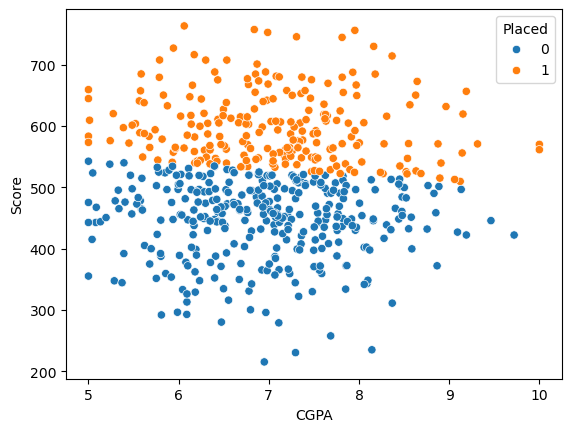

In [3]:
# check the distribution of the data

sns.scatterplot(x='CGPA', y='Score', data=dataset, hue='Placed')
plt.show()

In [4]:
# input and output variable selection

x = dataset.iloc[:, :-1]
y = dataset['Placed']

In [5]:
# scaling the input features

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [6]:
ss.fit(x)
x = pd.DataFrame(ss.transform(x), columns=x.columns)

In [12]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=42)

x_train.shape, y_train.shape

((110, 2), (110,))

In [ ]:
# model selection and training

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [24]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [25]:
# check the accuracy
knn.score(x_test, y_test) , knn.score(x_train, y_train)

(0.925, 0.9636363636363636)

In [26]:
# now change the neighbors values and check the accuracy

for i in range(1, 30):
    knn2 = KNeighborsClassifier(n_neighbors= i)
    knn2.fit(x_train, y_train)
    print(knn2.score(x_test, y_test), knn2.score(x_train, y_train), i)

0.9386363636363636 1.0 1
0.9295454545454546 0.9636363636363636 2
0.9295454545454546 0.9818181818181818 3
0.9227272727272727 0.9636363636363636 4
0.925 0.9545454545454546 5
0.9159090909090909 0.9363636363636364 6
0.9318181818181818 0.9454545454545454 7
0.9181818181818182 0.9272727272727272 8
0.9204545454545454 0.9363636363636364 9
0.9045454545454545 0.9090909090909091 10
0.9022727272727272 0.9272727272727272 11
0.9090909090909091 0.9181818181818182 12
0.8977272727272727 0.9 13
0.8954545454545455 0.9 14
0.8977272727272727 0.9 15
0.9090909090909091 0.9272727272727272 16
0.9 0.9090909090909091 17
0.9181818181818182 0.9272727272727272 18
0.9113636363636364 0.9363636363636364 19
0.925 0.9636363636363636 20
0.9181818181818182 0.9454545454545454 21
0.9295454545454546 0.9454545454545454 22
0.9136363636363637 0.9545454545454546 23
0.9272727272727272 0.9636363636363636 24
0.9181818181818182 0.9454545454545454 25
0.9181818181818182 0.9454545454545454 26
0.9181818181818182 0.9454545454545454 27
0.9

In [ ]:
# lits look like 2 should be the best value for n_neighbors

In [ ]:
# check the decision regions
from mlxtend.plotting import plot_decision_regions

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

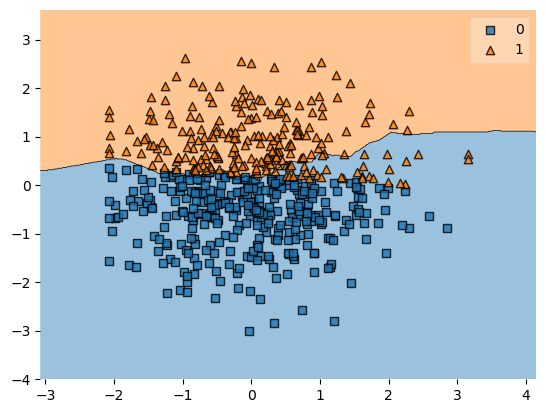

In [28]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf = knn)